<a href="https://colab.research.google.com/github/nisha1365/Sanofi-POC/blob/main/EDA_and_topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-	Day of week
-	Time in day (by slots)
-	Total number of counted words
-	Number of counted words after removing stopwords
-	Stopwords ratio (made from the two previous above)
-	Presence of hashtags, Y/N
-	Number of Hashtags used.
-	Presence of smileys


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/my_data.csv")
df

Unnamed: 0             tweet_id  external_twitter_id  \
0               0              1030258         1.684840e+18   
1               1              1030186         1.684590e+18   
2               2              1030263         1.684810e+18   
3               3              1030274         1.684720e+18   
4               4              1030288         1.684660e+18   
...           ...                  ...                  ...   
29798       29798  1683839551645814784                  NaN   
29799       29799  1683938283003183104                  NaN   
29800       29800  1683861079674195968                  NaN   
29801       29801  1683918306082955264                  NaN   
29802       29802  1683834001562140672                  NaN   

                                                    text     author_id  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...  9.050890e+17   
1      Roche Drops Hemophilia A Candidate, Prepares f...  7.638583e+07   
2      Roche moves one Spark hemophilia gene therapy ...  1.481280e+18   
3      On #WorldHepatitisDay we put middle finger up ...  1.145270e+18   
4      One of our newest internship programs, launche...  2.112887e+08   
...                                                  ...           ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  1.479181e+18   
29799  Was discussing hemophilia with an intelligent,...  2.760856e+08   
29800  The affected &amp; infected have waited decade...  1.104181e+08   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  1.179873e+18   
29802  Save the date to “tee up for a cure” on Monday...  4.867600e+08   

                created_at lang  referenced_tweets_type  referenced_tweets_id  \
0         28-07-2023 08:18   en                       0          0.000000e+00   
1         27-07-2023 15:51   en                       0          0.000000e+00   
2         28-07-2023 06:34   en                       0          0.000000e+00   
3         28-07-2023 00:27   en                       0          0.000000e+00   
4         27-07-2023 20:13   en                       3          1.684630e+18   
...                    ...  ...                     ...                   ...   
29798  2023-07-25 14:00:07   en                       0          0.000000e+00   
29799  2023-07-25 20:32:27   en                       0          0.000000e+00   
29800  2023-07-25 15:25:40   en                       3          1.683849e+18   
29801  2023-07-25 19:13:04   en                       2          1.683918e+18   
29802  2023-07-25 13:38:04   en                       0          0.000000e+00   

      infos  association_tweet_id  association_scope_id  
0        {}               1030258                    10  
1        {}               1030186                    10  
2        {}               1030263                    10  
3        {}               1030274                    10  
4        {}               1030288                    10  
...     ...                   ...                   ...  
29798    {}   1683839551645814784                    10  
29799    {}   1683938283003183104                    10  
29800    {}   1683861079674195968                    10  
29801    {}   1683918306082955264                    10  
29802    {}   1683834001562140672                    10  

[29803 rows x 12 columns]

In [ ]:
columns_to_keep = ['author_id','tweet_id','text','created_at']

new_df = df[columns_to_keep]
print(new_df)

          author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18  
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51  
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34  
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27  
4      One of our newest internship programs, launche...     27-07-2023

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18  
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51  
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34  
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27  
4      One of our newest internship programs, launche...     27-07-2023 20:13  
...                                                  ...                  ...  
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07  
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27  
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40  
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04  
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04  

[29803 rows x 4 columns]

In [ ]:
new_df.isnull().sum()

author_id     0
tweet_id      0
text          0
created_at    0
dtype: int64

In [ ]:
print(new_df['created_at'].head())

0    28-07-2023 08:18
1    27-07-2023 15:51
2    28-07-2023 06:34
3    28-07-2023 00:27
4    27-07-2023 20:13
Name: created_at, dtype: object


In [ ]:
print(new_df['created_at'].dtype)

object


In [ ]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
new_df['created_at_1'] = pd.to_datetime(new_df['created_at'], errors = 'coerce')


# Create a new column for the date, time, and day
new_df['date'] = new_df['created_at_1'].dt.date
new_df['time'] = new_df['created_at_1'].dt.time
new_df['day_of_week'] = new_df['created_at_1'].dt.day_name()
# Display the updated DataFrame
new_df

<ipython-input-16-e8d307d29e5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['created_at_1'] = pd.to_datetime(new_df['created_at'], errors = 'coerce')
<ipython-input-16-e8d307d29e5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['created_at_1'].dt.date
<ipython-input-16-e8d307d29e5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday  
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday  
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday  
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday  
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday  
...                   ...         ...       ...         ...  
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday  
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday  
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday  
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday  
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday  

[29803 rows x 8 columns]

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday  
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday  
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday  
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday  
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday  
...                   ...         ...       ...         ...  
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday  
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday  
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday  
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday  
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday  

[29803 rows x 8 columns]

In [ ]:
new_df.isnull().sum()

author_id       0
tweet_id        0
text            0
created_at      0
created_at_1    0
date            0
time            0
day_of_week     0
dtype: int64

In [ ]:
new_df['has_hashtags'] = new_df['text'].str.contains('#', case = False)

#Count nummber of hashtags
new_df['num_hashtags'] = new_df['text'].apply(lambda x: len([ c for c in x if c =='#']))


<ipython-input-19-cc1076f3d044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['has_hashtags'] = new_df['text'].str.contains('#', case = False)
<ipython-input-19-cc1076f3d044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['num_hashtags'] = new_df['text'].apply(lambda x: len([ c for c in x if c =='#']))


In [ ]:
new_df.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1        date      time day_of_week  \
0  28-07-2023 08:18 2023-07-28 08:18:00  2023-07-28  08:18:00      Friday   
1  27-07-2023 15:51 2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday   
2  28-07-2023 06:34 2023-07-28 06:34:00  2023-07-28  06:34:00      Friday   
3  28-07-2023 00:27 2023-07-28 00:27:00  2023-07-28  00:27:00      Friday   
4  27-07-2023 20:13 2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday   

   has_hashtags  num_hashtags  
0          True             1  
1         False             0  
2         False             0  
3          True             9  
4          True             3

In [ ]:
new_df['list_of_hashtags'] = new_df['text'].apply(lambda x: [word for word in x.split() if word.startswith("#")])
new_df

<ipython-input-21-97c8d8aeb549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['list_of_hashtags'] = new_df['text'].apply(lambda x: [word for word in x.split() if word.startswith("#")])


author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  
0                 1                                     [#AxioActive💪]  
1                 0                                                 []  
2                 0                                                 []  
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...  
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...  
...             ...                                                ...  
29798             2                             [#hemophilia, #GHRpod]  
29799             0                                                 []  
29800             3                        [#haemophilia, #HIV, #HEPC]  
29801             0                                                 []  
29802             0                                                 []  

[29803 rows x 11 columns]

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
# check for presence of emojis
new_df['has_emojis'] = new_df['text'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x))

#Extract emojis into a list
new_df['emojis_list'] = new_df['text'].apply(lambda x: [char for char in x if char in emoji.EMOJI_DATA])

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  \
0                 1                                     [#AxioActive💪]   
1                 0                                                 []   
2                 0                                                 []   
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...   
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...   
...             ...                                                ...   
29798             2                             [#hemophilia, #GHRpod]   
29799             0                                                 []   
29800             3                        [#haemophilia, #HIV, #HEPC]   
29801             0                                                 []   
29802             0                                                 []   

       has_emojis emojis_list  
0            True         [💪]  
1           False          []  
2           False          []  
3           False          []  
4            True         [🤩]  
...           ...         ...  
29798       False          []  
29799        True   [🤦, 🏻, ♀]  
29800       False          []  
29801       False          []  
29802        True         [⛳]  

[29803 rows x 13 columns]

In [ ]:
new_df['num_of_emoji'] = new_df['emojis_list'].apply(len)
new_df.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1        date      time day_of_week  \
0  28-07-2023 08:18 2023-07-28 08:18:00  2023-07-28  08:18:00      Friday   
1  27-07-2023 15:51 2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday   
2  28-07-2023 06:34 2023-07-28 06:34:00  2023-07-28  06:34:00      Friday   
3  28-07-2023 00:27 2023-07-28 00:27:00  2023-07-28  00:27:00      Friday   
4  27-07-2023 20:13 2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday   

   has_hashtags  num_hashtags  \
0          True             1   
1         False             0   
2         False             0   
3          True             9   
4          True             3   

                                    list_of_hashtags  has_emojis emojis_list  \
0                                     [#AxioActive💪]        True         [💪]   
1                                                 []       False          []   
2                                                 []       False          []   
3  [#WorldHepatitisDay, #Australia’s, #health, #c...       False          []   
4  [#SpecialtyPharmacy., #NationalInternDay, #AMC...        True         [🤩]   

   num_of_emoji  
0             1  
1             0  
2             0  
3             0  
4             1

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  \
0                 1                                     [#AxioActive💪]   
1                 0                                                 []   
2                 0                                                 []   
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...   
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...   
...             ...                                                ...   
29798             2                             [#hemophilia, #GHRpod]   
29799             0                                                 []   
29800             3                        [#haemophilia, #HIV, #HEPC]   
29801             0                                                 []   
29802             0                                                 []   

       has_emojis emojis_list  num_of_emoji  
0            True         [💪]             1  
1           False          []             0  
2           False          []             0  
3           False          []             0  
4            True         [🤩]             1  
...           ...         ...           ...  
29798       False          []             0  
29799        True   [🤦, 🏻, ♀]             3  
29800       False          []             0  
29801       False          []             0  
29802        True         [⛳]             1  

[29803 rows x 14 columns]

In [ ]:
# count the number of words
new_df['num_words'] = new_df['text'].apply(lambda x: len(x.split()))


In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  \
0                 1                                     [#AxioActive💪]   
1                 0                                                 []   
2                 0                                                 []   
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...   
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...   
...             ...                                                ...   
29798             2                             [#hemophilia, #GHRpod]   
29799             0                                                 []   
29800             3                        [#haemophilia, #HIV, #HEPC]   
29801             0                                                 []   
29802             0                                                 []   

       has_emojis emojis_list  num_of_emoji  num_words  
0            True         [💪]             1         41  
1           False          []             0         13  
2           False          []             0         12  
3           False          []             0         37  
4            True         [🤩]             1         26  
...           ...         ...           ...        ...  
29798       False          []             0         29  
29799        True   [🤦, 🏻, ♀]             3         41  
29800       False          []             0         50  
29801       False          []             0          6  
29802        True         [⛳]             1         27  

[29803 ro

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function to count words after removing stopwords
def count_words_without_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = [word for word in text.split() if word.lower() not in stop_words]
  return len(words)

new_df['num_words_without_stopwords'] = new_df['text'].apply(count_words_without_stopwords)

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  \
0                 1                                     [#AxioActive💪]   
1                 0                                                 []   
2                 0                                                 []   
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...   
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...   
...             ...                                                ...   
29798             2                             [#hemophilia, #GHRpod]   
29799             0                                                 []   
29800             3                        [#haemophilia, #HIV, #HEPC]   
29801             0                                                 []   
29802             0                                                 []   

       has_emojis emojis_list  num_of_emoji  num_words  \
0            True         [💪]             1         41   
1           False          []             0         13   
2           False          []             0         12   
3           False          []             0         37   
4            True         [🤩]             1         26   
...           ...         ...           ...        ...   
29798       False          []             0         29   
29799        True   [🤦, 🏻, ♀]             3         41   
29800       False          []             0         50   
29801       False          []             0          6   
29802        True         [⛳]             1         27  

In [ ]:
# create a new column with stopword ratio
new_df['stopword_ratio'] = new_df['num_words_without_stopwords']/new_df['num_words']

In [ ]:
new_df

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1        date      time day_of_week  has_hashtags  \
0     2023-07-28 08:18:00  2023-07-28  08:18:00      Friday          True   
1     2023-07-27 15:51:00  2023-07-27  15:51:00    Thursday         False   
2     2023-07-28 06:34:00  2023-07-28  06:34:00      Friday         False   
3     2023-07-28 00:27:00  2023-07-28  00:27:00      Friday          True   
4     2023-07-27 20:13:00  2023-07-27  20:13:00    Thursday          True   
...                   ...         ...       ...         ...           ...   
29798 2023-07-25 14:00:07  2023-07-25  14:00:07     Tuesday          True   
29799 2023-07-25 20:32:27  2023-07-25  20:32:27     Tuesday         False   
29800 2023-07-25 15:25:40  2023-07-25  15:25:40     Tuesday          True   
29801 2023-07-25 19:13:04  2023-07-25  19:13:04     Tuesday         False   
29802 2023-07-25 13:38:04  2023-07-25  13:38:04     Tuesday         False   

       num_hashtags                                   list_of_hashtags  \
0                 1                                     [#AxioActive💪]   
1                 0                                                 []   
2                 0                                                 []   
3                 9  [#WorldHepatitisDay, #Australia’s, #health, #c...   
4                 3  [#SpecialtyPharmacy., #NationalInternDay, #AMC...   
...             ...                                                ...   
29798             2                             [#hemophilia, #GHRpod]   
29799             0                                                 []   
29800             3                        [#haemophilia, #HIV, #HEPC]   
29801             0                                                 []   
29802             0                                                 []   

       has_emojis emojis_list  num_of_emoji  num_words  \
0            True         [💪]             1         41   
1           False          []             0         13   
2           False          []             0         12   
3           False          []             0         37   
4            True         [🤩]             1         26   
...           ...         ...           ...        ...   
29798       False          []             0         29   
29799        True   [🤦, 🏻, ♀]             3         41   
29800       False          []             0         50   
29801       False          []             0          6   
29802        True         [⛳]             1         27  

In [ ]:
hashtag_counts = new_df['has_hashtags'].value_counts()
hashtag_counts

False    16167
True     13636
Name: has_hashtags, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Bar Plots for Hashtags Counts**

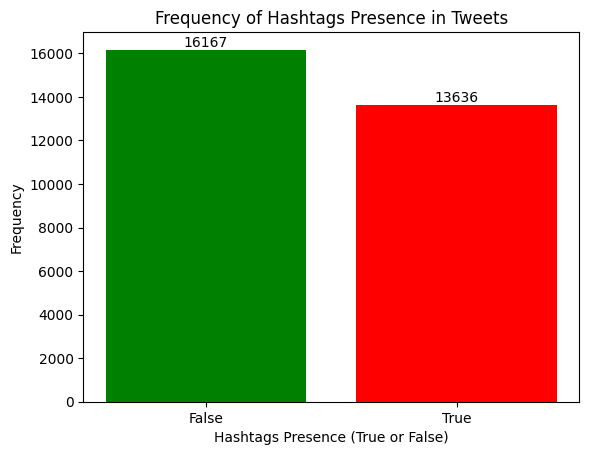

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(hashtag_counts.index.astype(str), hashtag_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('Hashtags Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of Hashtags Presence in Tweets')
plt.show()

In [ ]:
emoji_counts = new_df['has_emojis'].value_counts()
emoji_counts

False    26122
True      3681
Name: has_emojis, dtype: int64

**Bar Plot for Emojis Count**

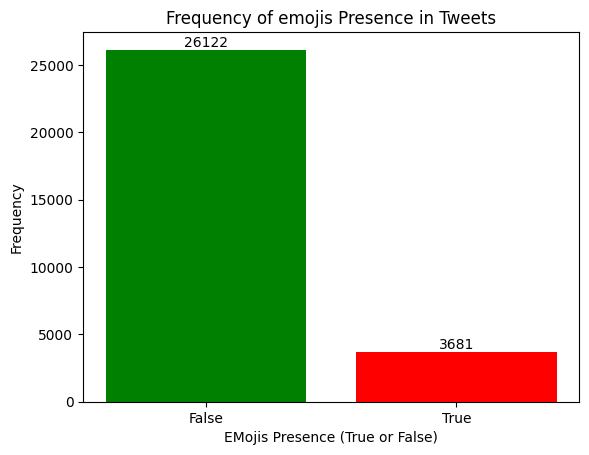

In [ ]:
# Plot the frequency of True and False values with annotations
fig, ax = plt.subplots()
bars = plt.bar(emoji_counts.index.astype(str), emoji_counts, color=['green', 'red'])

# Add annotations with value counts within the bars
for bar in bars:
  yval = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.xlabel('EMojis Presence (True or False)')
plt.ylabel('Frequency')
plt.title('Frequency of emojis Presence in Tweets')
plt.show()

**Frequency of Tweets on Each Day of the Week**

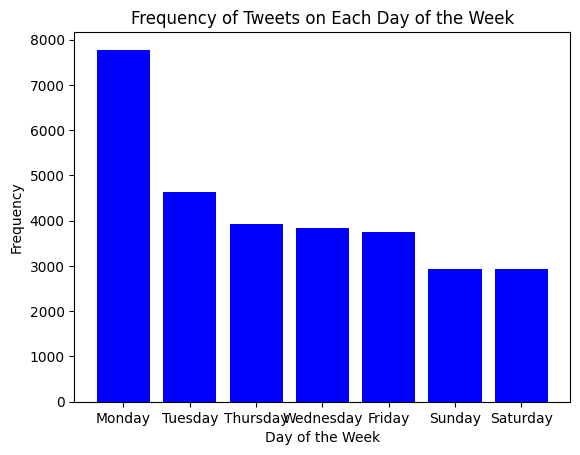

In [ ]:
day_of_week_counts = new_df['day_of_week'].value_counts()

plt.bar(day_of_week_counts.index, day_of_week_counts, color = 'blue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Tweets on Each Day of the Week')
plt.show()

In [ ]:
day_of_week_counts

Monday       7775
Tuesday      4629
Thursday     3930
Wednesday    3847
Friday       3755
Sunday       2936
Saturday     2931
Name: day_of_week, dtype: int64

In [ ]:
# Find the highest number of hashtags and emojis
max_hashtags_author = new_df.loc[new_df['num_hashtags'].idxmax(), 'author_id']
max_hashtags_tweet = new_df.loc[new_df['num_hashtags'].idxmax(), 'tweet_id']
max_emojis_author = new_df.loc[new_df['emojis_list'].apply(len).idxmax(), 'author_id']
max_emojis_tweet = new_df.loc[new_df['emojis_list'].apply(len).idxmax(), 'tweet_id']

print(f"Highest number of hashtags by Author {max_hashtags_author} in Tweet {max_hashtags_tweet}")
print(f"Highest number of emojis by Author {max_emojis_author} in Tweet {max_emojis_tweet}")

Highest number of hashtags by Author 1.55213e+18 in Tweet 168795
Highest number of emojis by Author 1.40121e+18 in Tweet 172011


In [ ]:
!pip install tweet-preprocessor

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=d1e157492bc08f32f69107483b4c8600fbcb2616b65112ab22800d1a17871491
  Stored in di

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# **Import the dataset:**

In [ ]:
data_tweet = new_df.loc[:, ['author_id', 'tweet_id','text', 'created_at','created_at_1']]
data_tweet

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1  
0     2023-07-28 08:18:00  
1     2023-07-27 15:51:00  
2     2023-07-28 06:34:00  
3     2023-07-28 00:27:00  
4     2023-07-27 20:13:00  
...                   ...  
29798 2023-07-25 14:00:07  
29799 2023-07-25 20:32:27  
29800 2023-07-25 15:25:40  
29801 2023-07-25 19:13:04  
29802 2023-07-25 13:38:04  

[29803 rows x 5 columns]

In [ ]:
data_tweet.isnull().sum()

author_id       0
tweet_id        0
text            0
created_at      0
created_at_1    0
dtype: int64

In [ ]:
data_tweet.shape

(29803, 5)

# **Data cleaning**

I will customize the preprocessor to exclude removing hashtags since they are valuable and I will form a separate feature for cleaned tweets.



In [ ]:
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_tweet['text']):
    data_tweet.loc[i,'new_text'] = p.clean(v)

data_tweet.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1  \
0  28-07-2023 08:18 2023-07-28 08:18:00   
1  27-07-2023 15:51 2023-07-27 15:51:00   
2  28-07-2023 06:34 2023-07-28 06:34:00   
3  28-07-2023 00:27 2023-07-28 00:27:00   
4  27-07-2023 20:13 2023-07-27 20:13:00   

                                            new_text  
0  peaks Challenge #AxioActive On the th of Augus...  
1  Roche Drops Hemophilia A Candidate, Prepares f...  
2  Roche moves one Spark hemophilia gene therapy ...  
3  On #WorldHepatitisDay we put middle finger up ...  
4  One of our newest internship programs, launche...

**I will remove only the ‘#’ sign and keep the word after.**

In [ ]:
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

data_tweet['new_text'] = data_tweet['new_text'].apply(lambda x:remove_hashtag_sign(x))

**Now, I will remove extra white spaces, punctuation and apply lower casing**

In [ ]:
#Remove extra white spaces, punctuation and apply lower casing
data_tweet['new_text'] = data_tweet['new_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_tweet.head()

author_id  tweet_id                                               text  \
0  9.050890e+17   1030258  3 peaks Challenge #AxioActive💪\n\nOn the 12th ...   
1  7.638583e+07   1030186  Roche Drops Hemophilia A Candidate, Prepares f...   
2  1.481280e+18   1030263  Roche moves one Spark hemophilia gene therapy ...   
3  1.145270e+18   1030274  On #WorldHepatitisDay we put middle finger up ...   
4  2.112887e+08   1030288  One of our newest internship programs, launche...   

         created_at        created_at_1  \
0  28-07-2023 08:18 2023-07-28 08:18:00   
1  27-07-2023 15:51 2023-07-27 15:51:00   
2  28-07-2023 06:34 2023-07-28 06:34:00   
3  28-07-2023 00:27 2023-07-28 00:27:00   
4  27-07-2023 20:13 2023-07-27 20:13:00   

                                            new_text  
0  peaks challenge axioactive on the th of august...  
1  roche drops hemophilia a candidate prepares fo...  
2  roche moves one spark hemophilia gene therapy ...  
3  on worldhepatitisday we put middle finger up t...  
4  one of our newest internship programs launched...

In [ ]:
data_tweet.shape

(29803, 6)

# **Our data is ready Now**

### In order to train BERTopic model, I need to prepare the tweet list and instantiate the Vectorizer to remove English stop words as follow:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data_tweet['new_lemma_text'] = data_tweet["new_text"].apply(lemmatize_text)

In [ ]:
data_tweet

author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  \
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18   
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51   
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34   
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27   
4      One of our newest internship programs, launche...     27-07-2023 20:13   
...                                                  ...                  ...   
29798  Hear more from Mosi Williams, Pys.D, on the la...  2023-07-25 14:00:07   
29799  Was discussing hemophilia with an intelligent,...  2023-07-25 20:32:27   
29800  The affected &amp; infected have waited decade...  2023-07-25 15:25:40   
29801  @MohmdBio Sickle cell anemia, Thalassemia, Hem...  2023-07-25 19:13:04   
29802  Save the date to “tee up for a cure” on Monday...  2023-07-25 13:38:04   

             created_at_1                                           new_text  \
0     2023-07-28 08:18:00  peaks challenge axioactive on the th of august...   
1     2023-07-27 15:51:00  roche drops hemophilia a candidate prepares fo...   
2     2023-07-28 06:34:00  roche moves one spark hemophilia gene therapy ...   
3     2023-07-28 00:27:00  on worldhepatitisday we put middle finger up t...   
4     2023-07-27 20:13:00  one of our newest internship programs launched...   
...                   ...                                                ...   
29798 2023-07-25 14:00:07  hear more from mosi williams pys d on the late...   
29799 2023-07-25 20:32:27  was discussing hemophilia with an intelligent ...   
29800 2023-07-25 15:25:40  the affected amp infected have waited decades ...   
29801 2023-07-25 19:13:04          sickle cell anemia thalassemia hemophilia   
29802 2023-07-25 13:38:04  save the date to tee up for a cure on monday n...   

                                          new_lemma_text  
0      peak challenge axioactive on the th of august ...  
1      roche drop hemophilia a candidate prepares for...  
2      roche move one spark hemophilia gene therapy i...  
3      on worldhepatitisday we put middle finger up t...  
4      one of our newest internship program launched ...  
...                                                  ...  
29798  hear more from mosi williams pys d on the late...  
29799  wa discussing hemophilia with an intelligent e...  
29800  the affected amp infected have waited decade f...  
29801          sickle cell anemia thalassemia hemophilia  
29802  save the date to tee up for a cure on monday n...  

[29803 rows x 7 columns]

**Let’s create our BERTopic model using BERTweet as a sentence embedding.**

### Extracting embeddings: converting the data to numerical representation. This is important for the clustering procedure as embedding models are otpimized for semantic similarity.

In [ ]:
!pip install emoji

In [ ]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [ ]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
# #Tokenize topics
# nltk.download('stopwords')
# stopwords = stopwords.words('english')
# vectorizer_model = CountVectorizer(stop_words= stopwords)

vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
#Create topic representation
ctfidf_model = ClassTfidfTransformer()

In [ ]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics='auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [ ]:
import time

In [ ]:
tweet_list = data_tweet.new_lemma_text.tolist()
timestamp=data_tweet.created_at.tolist()
timestamps=data_tweet.created_at_1.tolist()

In [ ]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-01-25 10:50:16,526 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/932 [00:00<?, ?it/s]

2024-01-25 10:50:34,225 - BERTopic - Embedding - Completed ✓
2024-01-25 10:50:34,226 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-25 10:51:40,180 - BERTopic - Dimensionality - Completed ✓
2024-01-25 10:51:40,183 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-25 11:05:31,301 - BERTopic - Cluster - Completed ✓
2024-01-25 11:05:31,303 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-25 11:05:49,801 - BERTopic - Representation - Completed ✓
2024-01-25 11:05:49,806 - BERTopic - Topic reduction - Reducing number of topics
2024-01-25 11:05:55,044 - BERTopic - Topic reduction - Reduced number of topics from 728 to 115


In [ ]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       -1   4435           -1_haemophilia_hemophilia_blood_bleeding   
1        0  21462            0_hemophilia_haemophilia_bleeding_blood   
2        1    222  1_bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwyspzcy_b...   
3        2    162                   2_curable_meditation_pcos_siddha   
4        3    138  3_0x6193bb90bd4b6be8c0bbb498cd996ddbc44ffa99_a...   
..     ...    ...                                                ...   
110    109     15                 109_forward_glad_presenting_seeing   
111    110     15                       110_aptt_fxi_pathway_assayed   
112    111     15                      111_nasal_nose_polyp_leukemia   
113    112     15              112_story_stream_thinking_inseparable   
114    113     15           113_sterile_amputated_hemorrhage_hygiene   

                                        Representation  \
0    [haemophilia, hemophilia, blood, bleeding, day...   
1    [hemophilia, haemophilia, bleeding, blood, tre...   
2    [bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwyspzcy, b...   
3    [curable, meditation, pcos, siddha, yoga, guru...   
4    [0x6193bb90bd4b6be8c0bbb498cd996ddbc44ffa99, a...   
..                                                 ...   
110  [forward, glad, presenting, seeing, won, polyh...   
111  [aptt, fxi, pathway, assayed, inhibitor, iv, d...   
112  [nasal, nose, polyp, leukemia, thrombocytopeni...   
113  [story, stream, thinking, inseparable, smashed...   
114  [sterile, amputated, hemorrhage, hygiene, infe...   

                                   Representative_Docs  
0    [haemophilia is a disorder in which the blood ...  
1    [march is bleeding disorder awareness month th...  
2    [guy help me a much a you can i have hemophili...  
3    [join gurudev siyag s siddha yoga meditation m...  
4    [guy help me a much a you can i have hemophili...  
..                                                 ...  
110  [looking forward to seeing everyone again, loo...  
111  [6 answer deficiency of or much le likely inhi...  
112  [le common cause of nosebleed include alcohol ...  
113  [i wrote this on my main twitter and i ll writ...  
114  [how would cutting make sense historically whe...  

[115 rows x 5 columns]

In [ ]:
topic_model.get_topic(0)

[('hemophilia', 0.008835295684549467),
 ('haemophilia', 0.0078600803315113),
 ('bleeding', 0.006959982584743725),
 ('blood', 0.006397938337370908),
 ('treatment', 0.006098635739550397),
 ('gene', 0.005801237892226064),
 ('factor', 0.0055248414439220935),
 ('care', 0.005357881022258707),
 ('worldhemophiliaday', 0.004982043877957656),
 ('disease', 0.004920873905353159)]

In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

Topic # 01                                  Topic # 02  \
0          hemophilia  bc1qckq4ta5t87qzjm7ykp5lrphjkrfyjrdwyspzcy   
1         haemophilia                                         bts   
2            bleeding                                   apartment   
3               blood                                       joint   
4           treatment                                        cure   
5                gene                                  hemophilia   
6              factor                                    cannabis   
7                care                                     venmome   
8  worldhemophiliaday                                     breeder   
9             disease                                      worked   

     Topic # 03                                  Topic # 04  Topic # 05  \
0       curable  0x6193bb90bd4b6be8c0bbb498cd996ddbc44ffa99       bleed   
1    meditation                                   apartment  amputation   
2          pcos                                       joint       grief   
3        siddha                                        cure   incurable   
4          yoga                                  hemophilia        hope   
5       gurudev                                      chiron  hemophilia   
6        autism                                     bedroom       leila   
7  mentalhealth                                        acre      deluge   
8  hypertension                                     bugatti      chatti   
9        phobia                                      square               

     Topic # 06  Topic # 07     Topic # 08  Topic # 09            Topic # 10  \
0         bleed  manchester          fviii      record                   joe   
1         grief   eahad2023       antibody         int                   son   
2    amputation  conference      inhibitor    claypool   hemophiliacommunity   
3     incurable   organiser  anhydrobiosis      justin              hemolife   
4   haemophilia       event      eahad2023         yds  vonwillebranddisease   
5        edward    ceremony         wfhccs      clutch   hemophiliaawareness   
6         slade   welcoming           gene  montgomery     bleedingdisorders   
7      folktale       venue   desmopressin         nfl               musical   
8        grieve  attendance       clinical       field     hemophiliawarrior   
9  superstition        meet  transplanting  hemophilia          complication   

   ...   Topic # 105         Topic # 106        Topic # 107  Topic # 108  \
0  ...           dog              judith            scandal         mary   
1  ...          cctv   cryoprecipitation         mankyblood     nebraska   
2  ...  veterinarian  womenshistorymonth      accountabilty      madison   
3  ...      kalakaua               vital          wallowing         lake   
4  ...          toby            treating               dung          mix   
5  ...        puppet              donate          hillbilly      contest   
6  ...      parasite               blood  contaminatedblood  competition   
7  ...          meow         shematology            corrupt        judge   
8  ...       tornado           discovery              spell    celebrity   
9  ...         death                  dr             battle   showcasing   

    Topic # 109 Topic # 110      Topic # 111       Topic # 112    Topic # 113  \
0           rsv     forward             aptt             nasal          story   
1        sanofi        glad              fxi              nose         stream   
2   respiratory  presenting          pathway             polyp       thinking   
3           eye      seeing          assayed          leukemia    inseparable   
4         virus         won        inhibitor  thrombocytopenia        smashed   
5  seekingalpha  polyhedron               iv            mucous            pod   
6        in2023        miss       deficiency   atherosclerosis      recording   
7  pharmaphorum        able  antiphospolipid      noncancer

In [ ]:
topic_model.visualize_barchart(top_n_topics=10, n_words = 10)

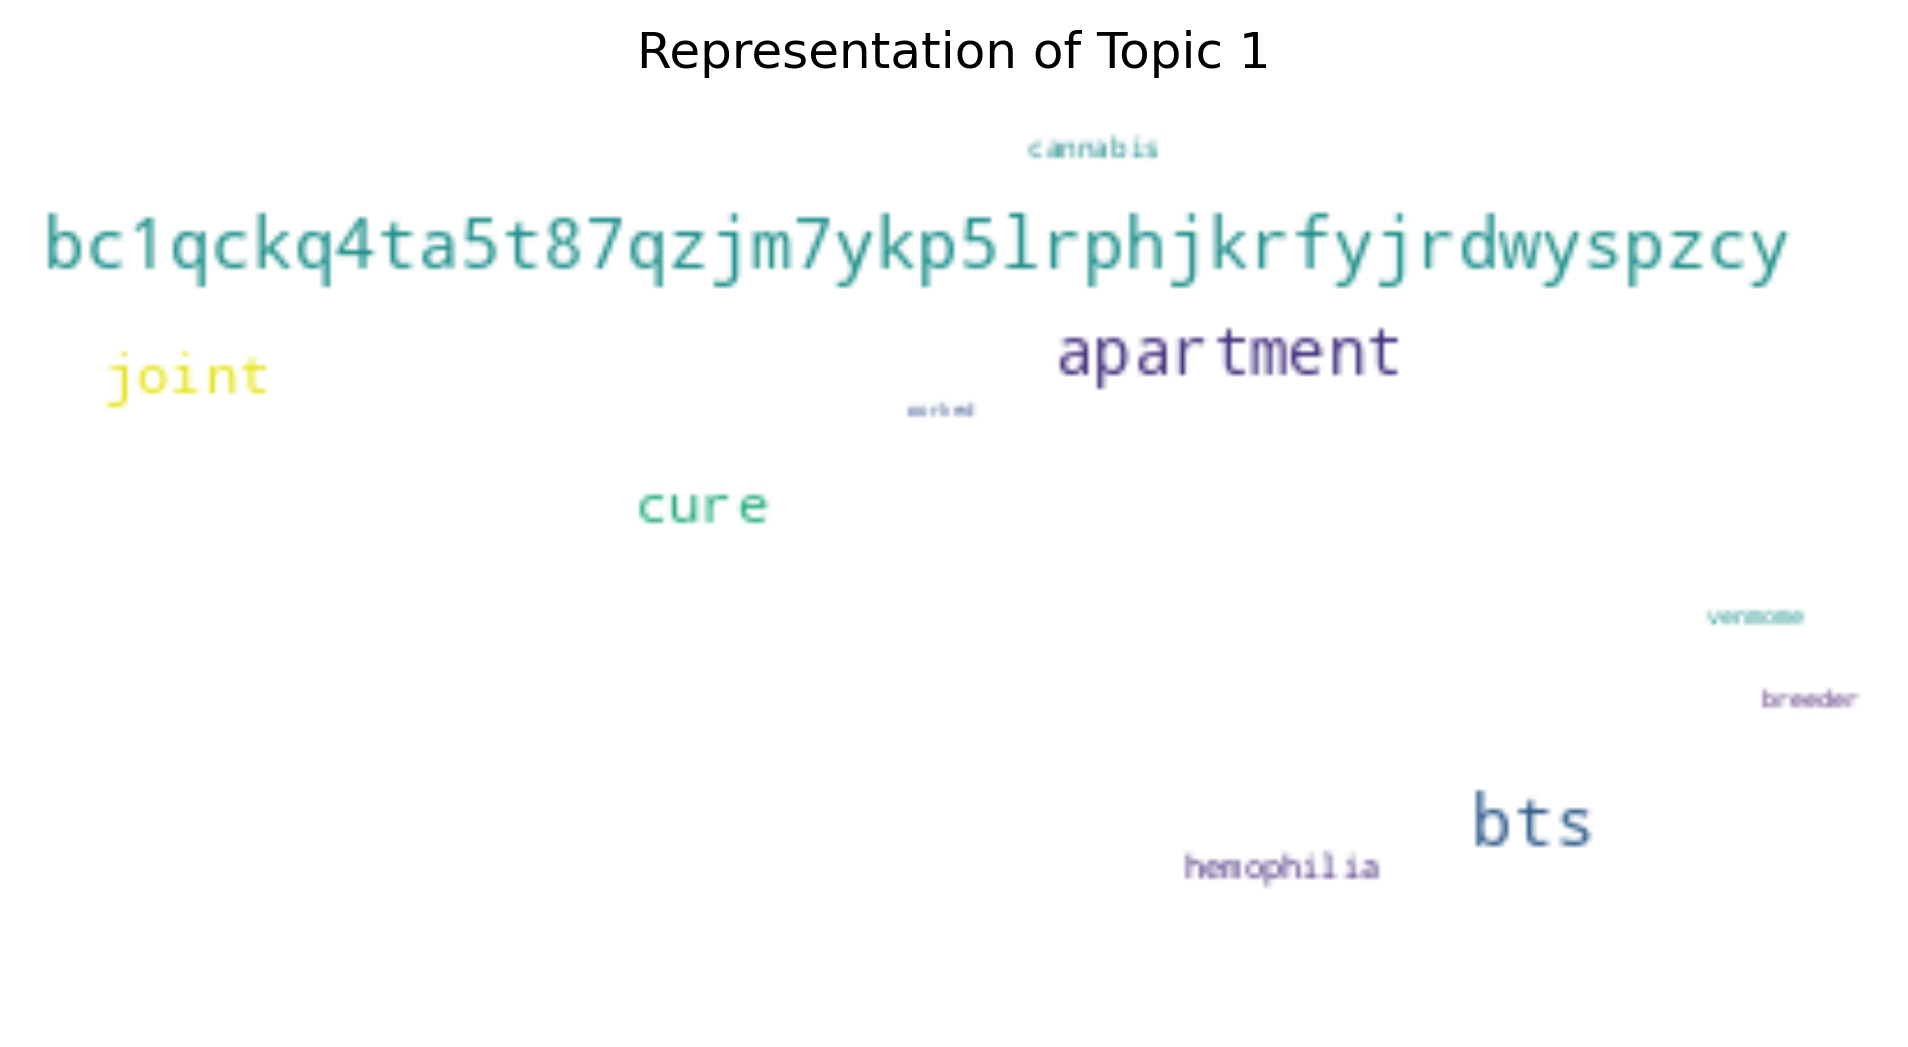

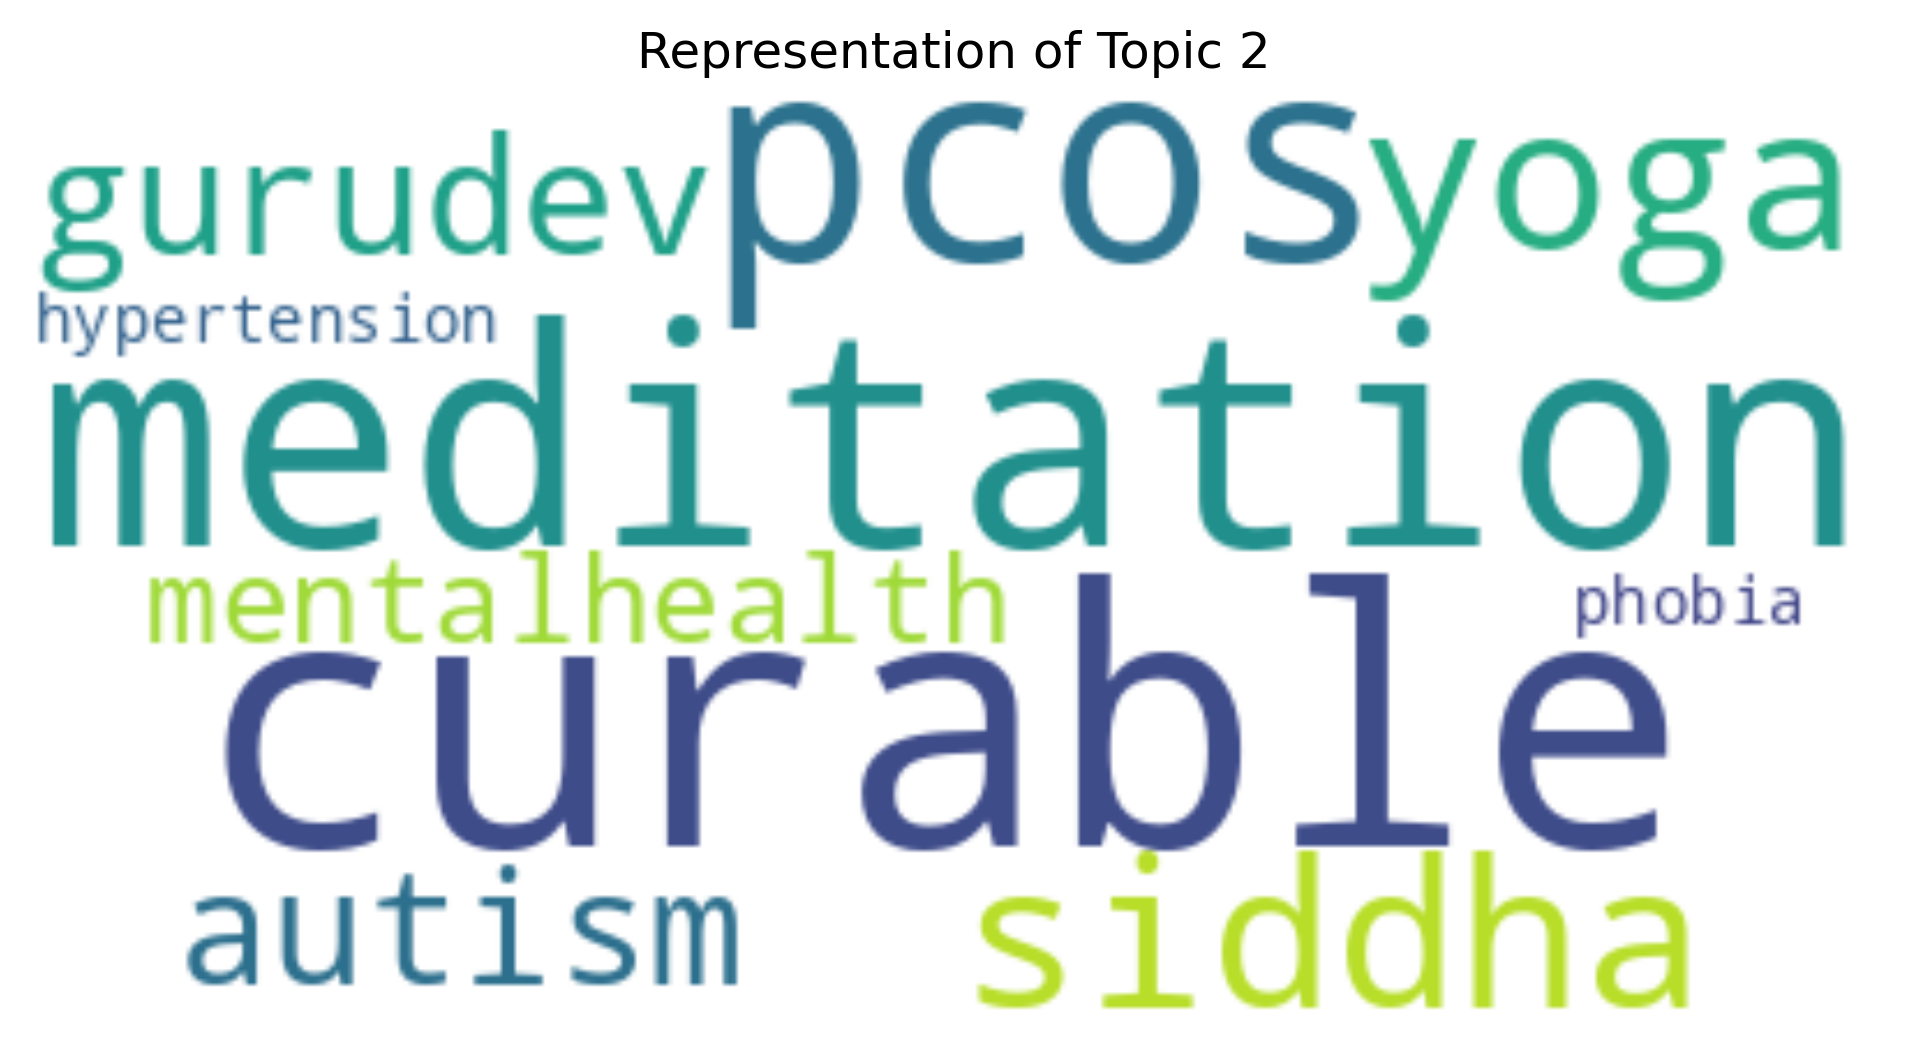

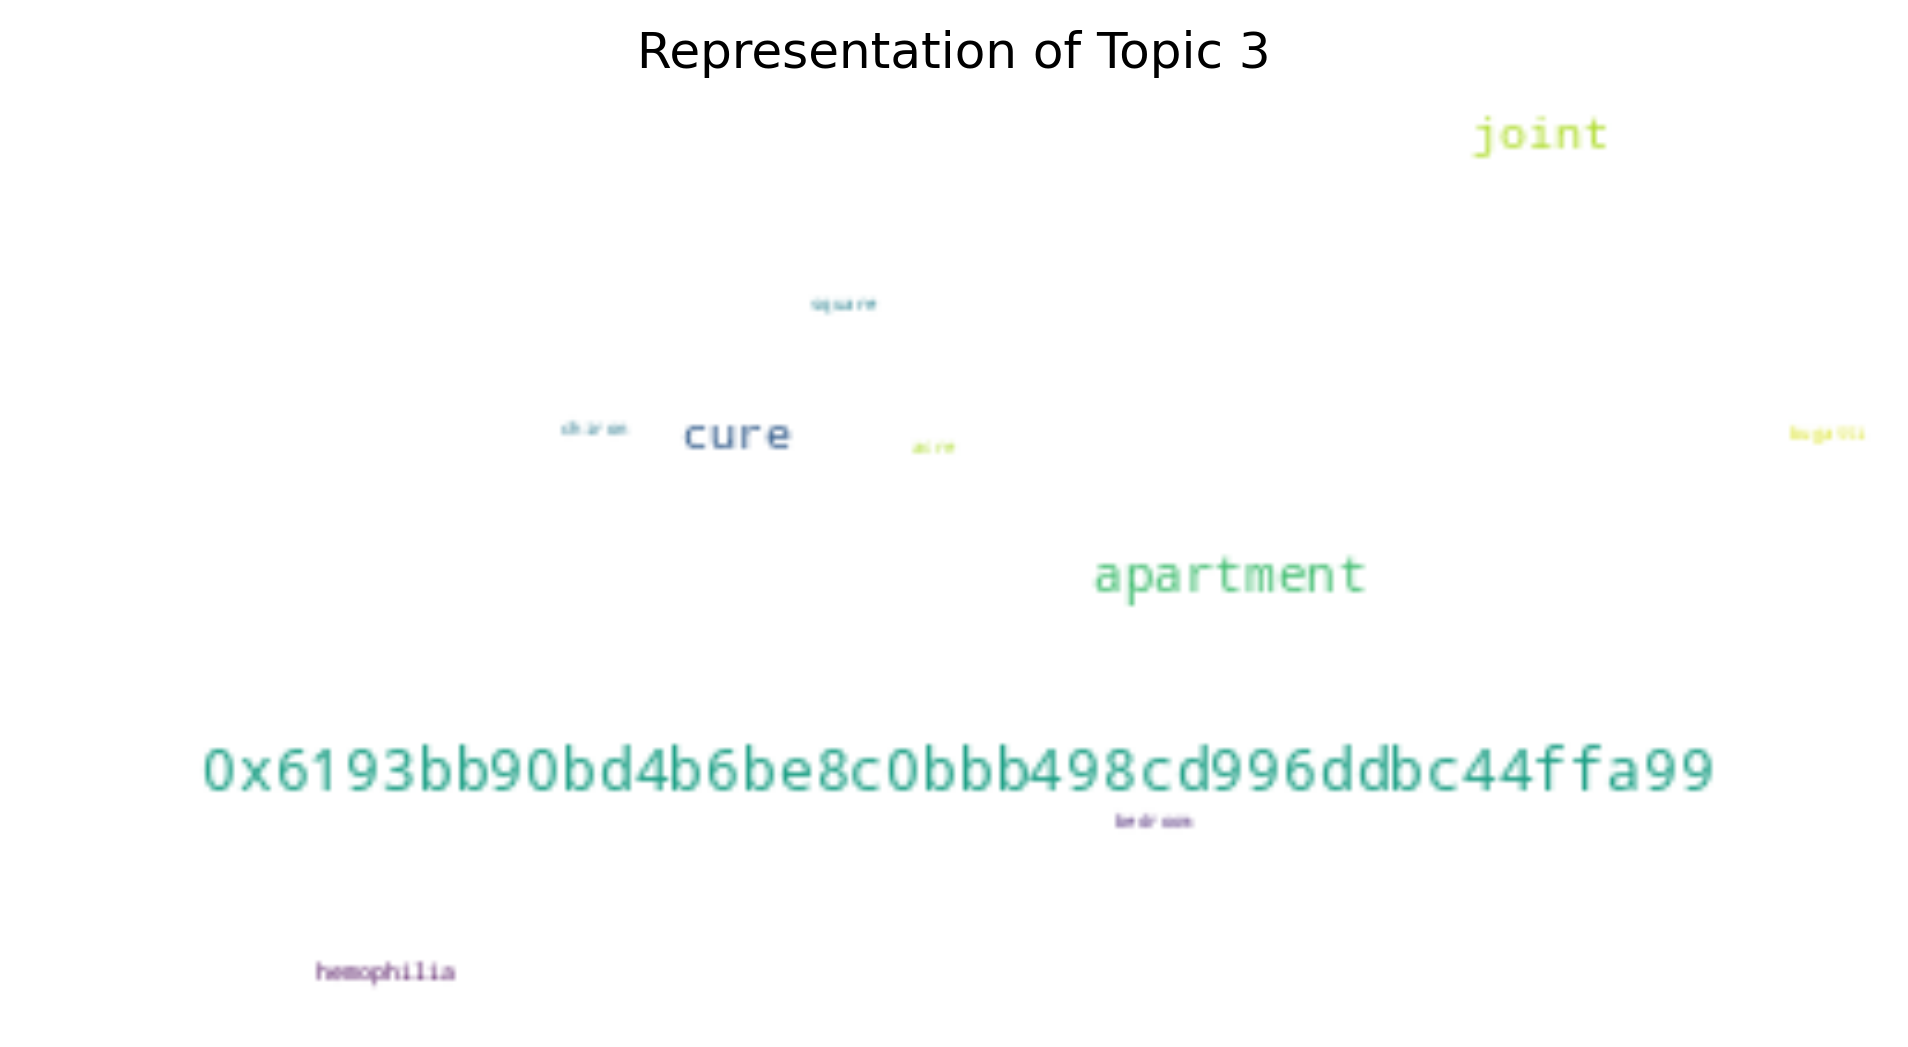

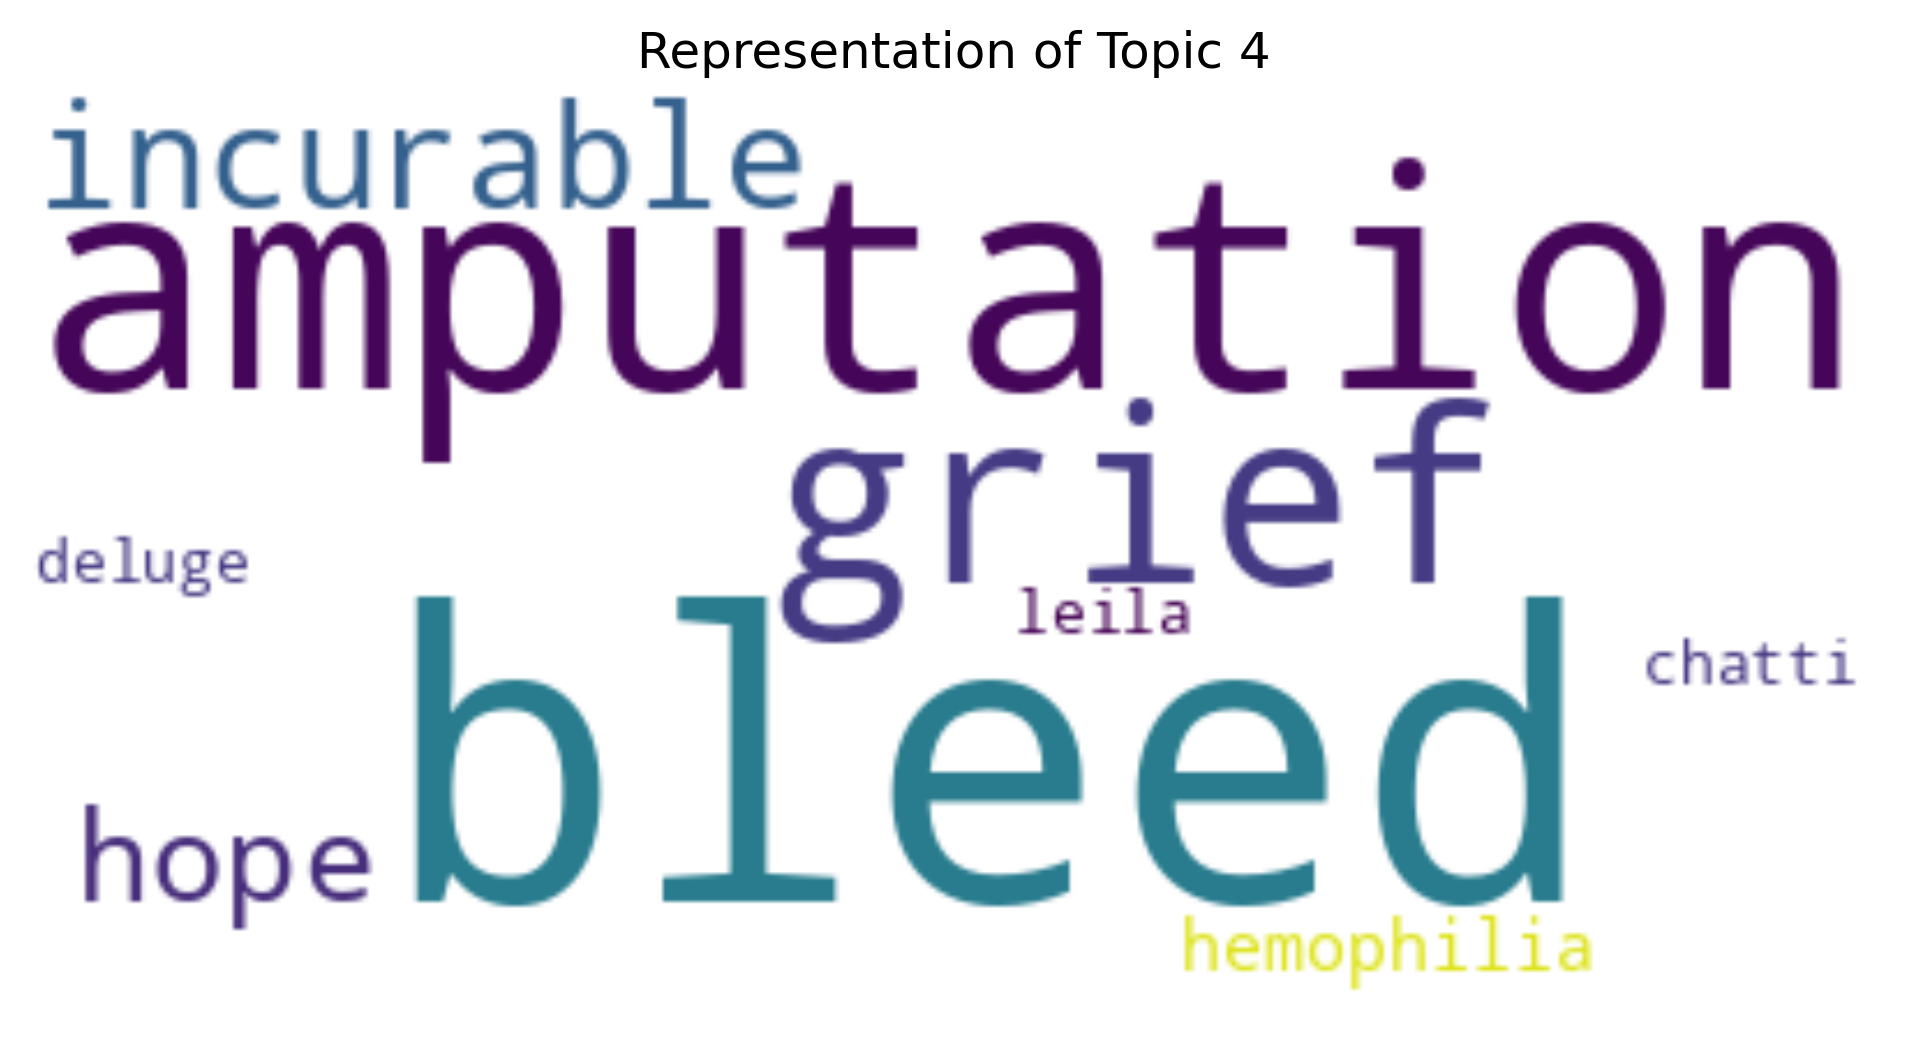

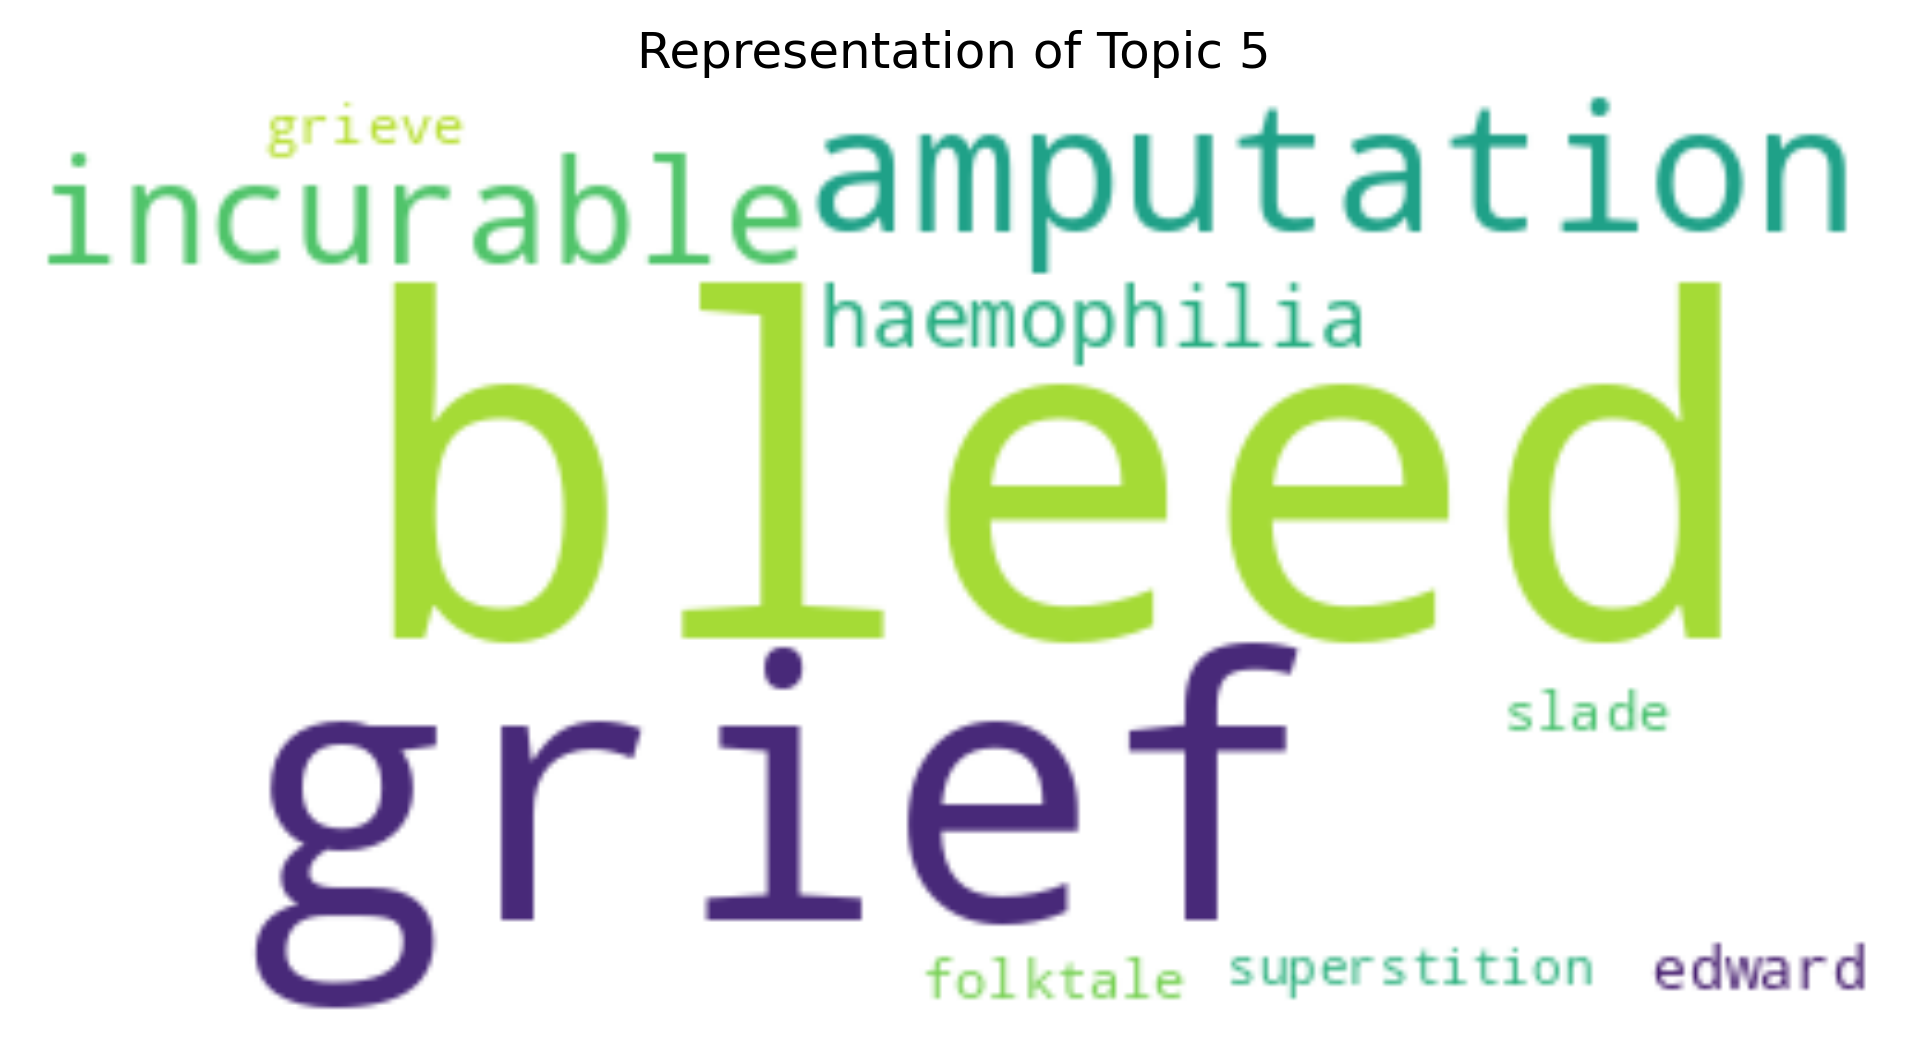

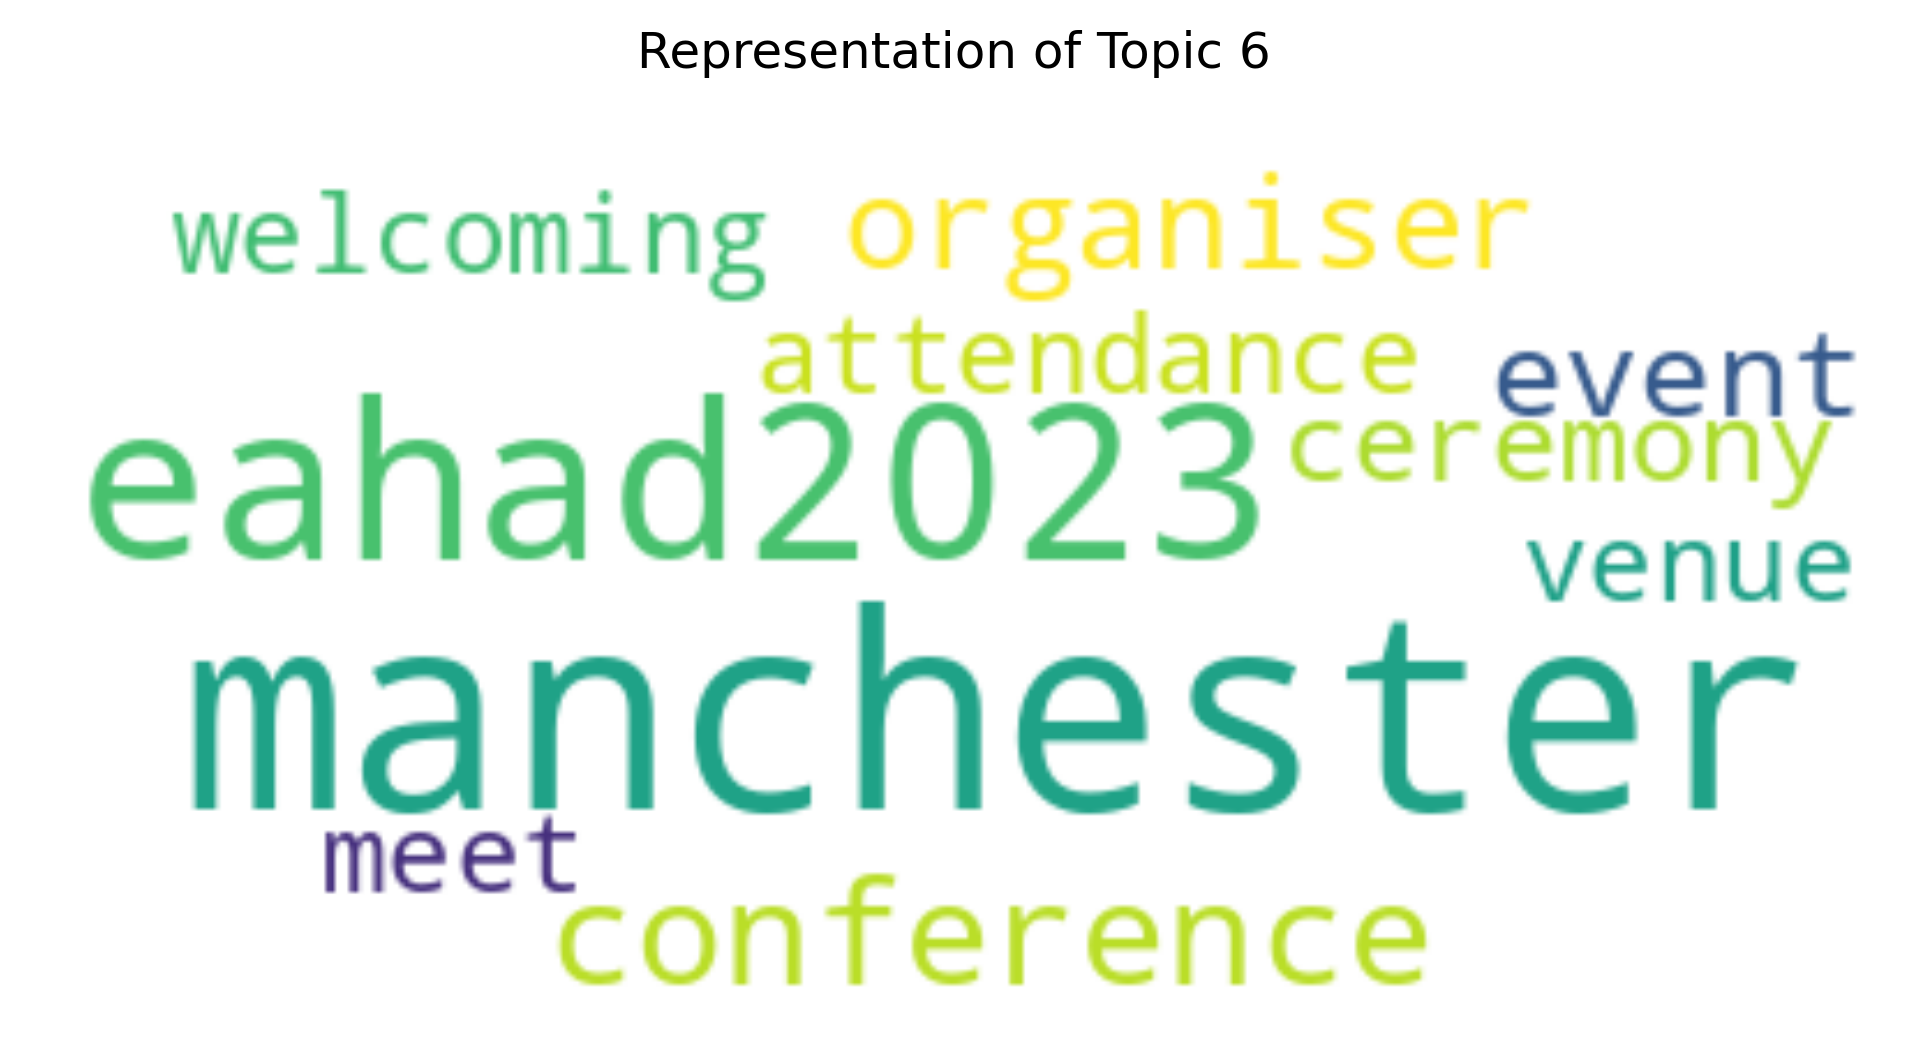

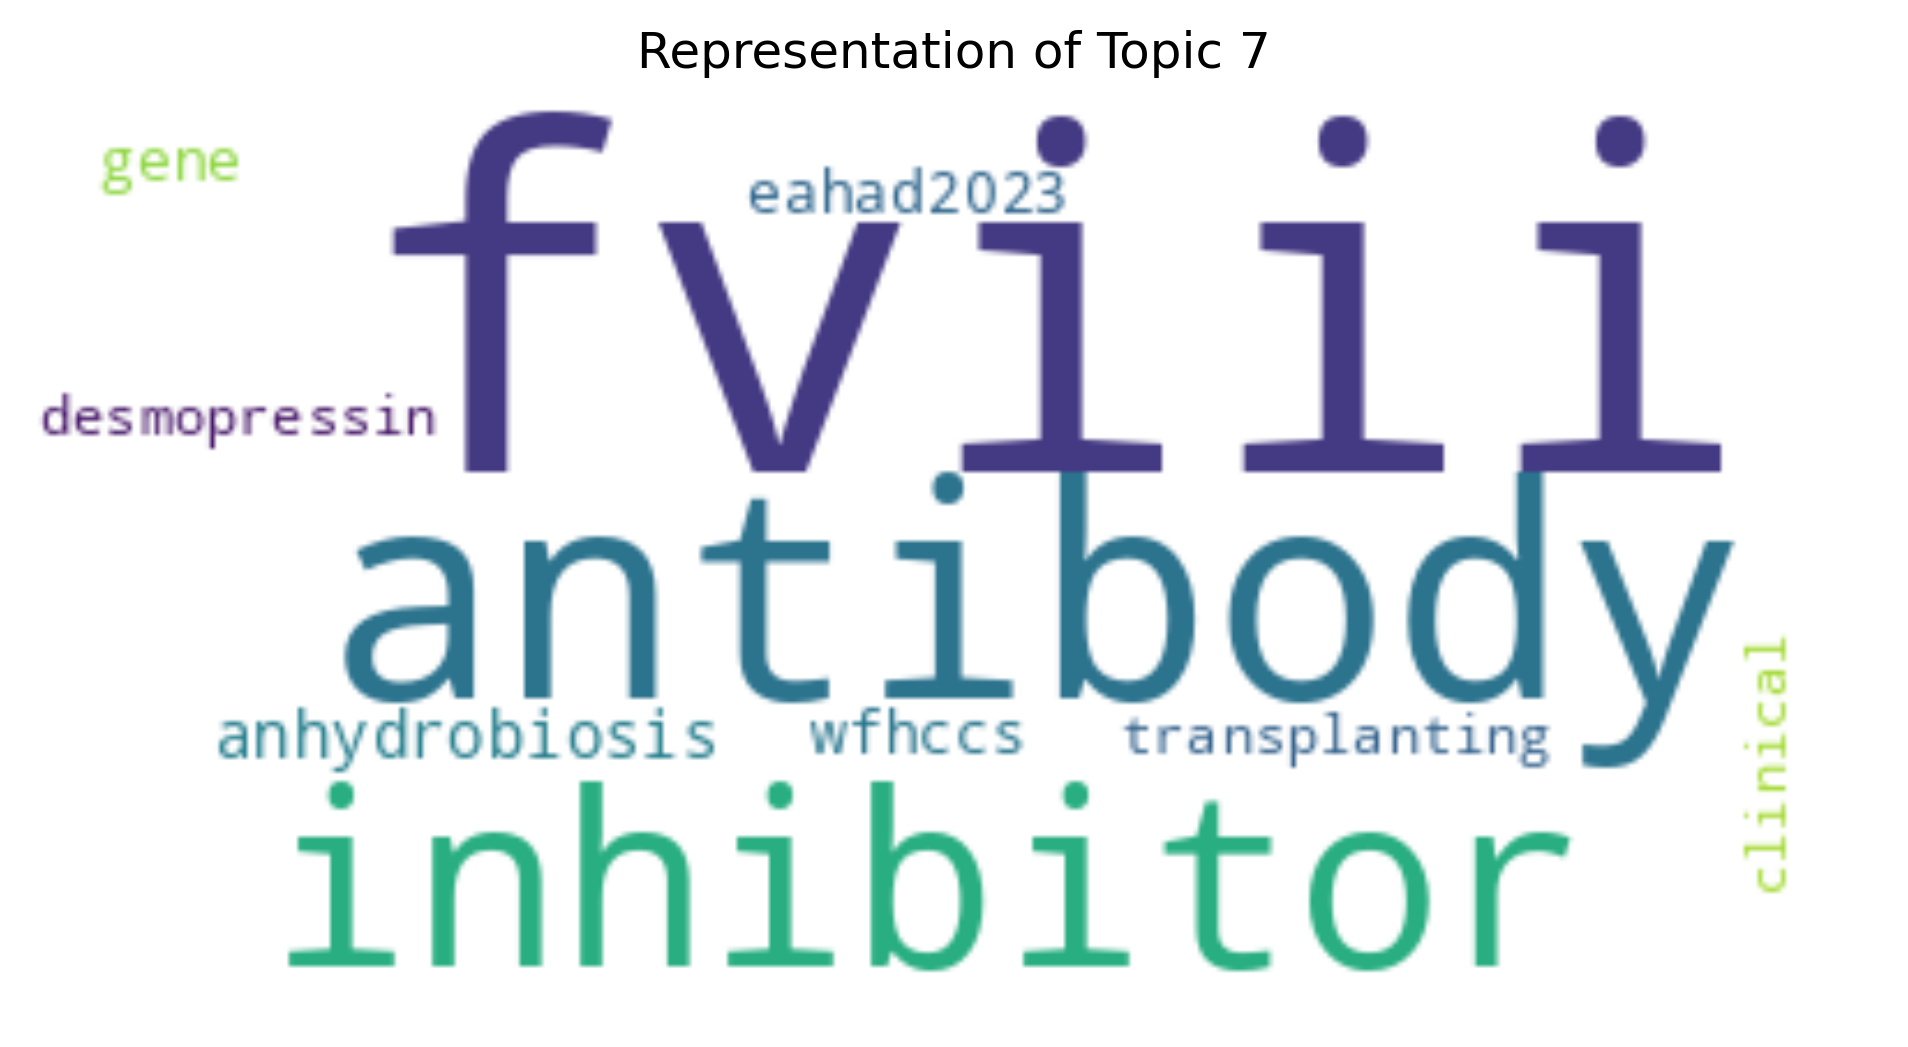

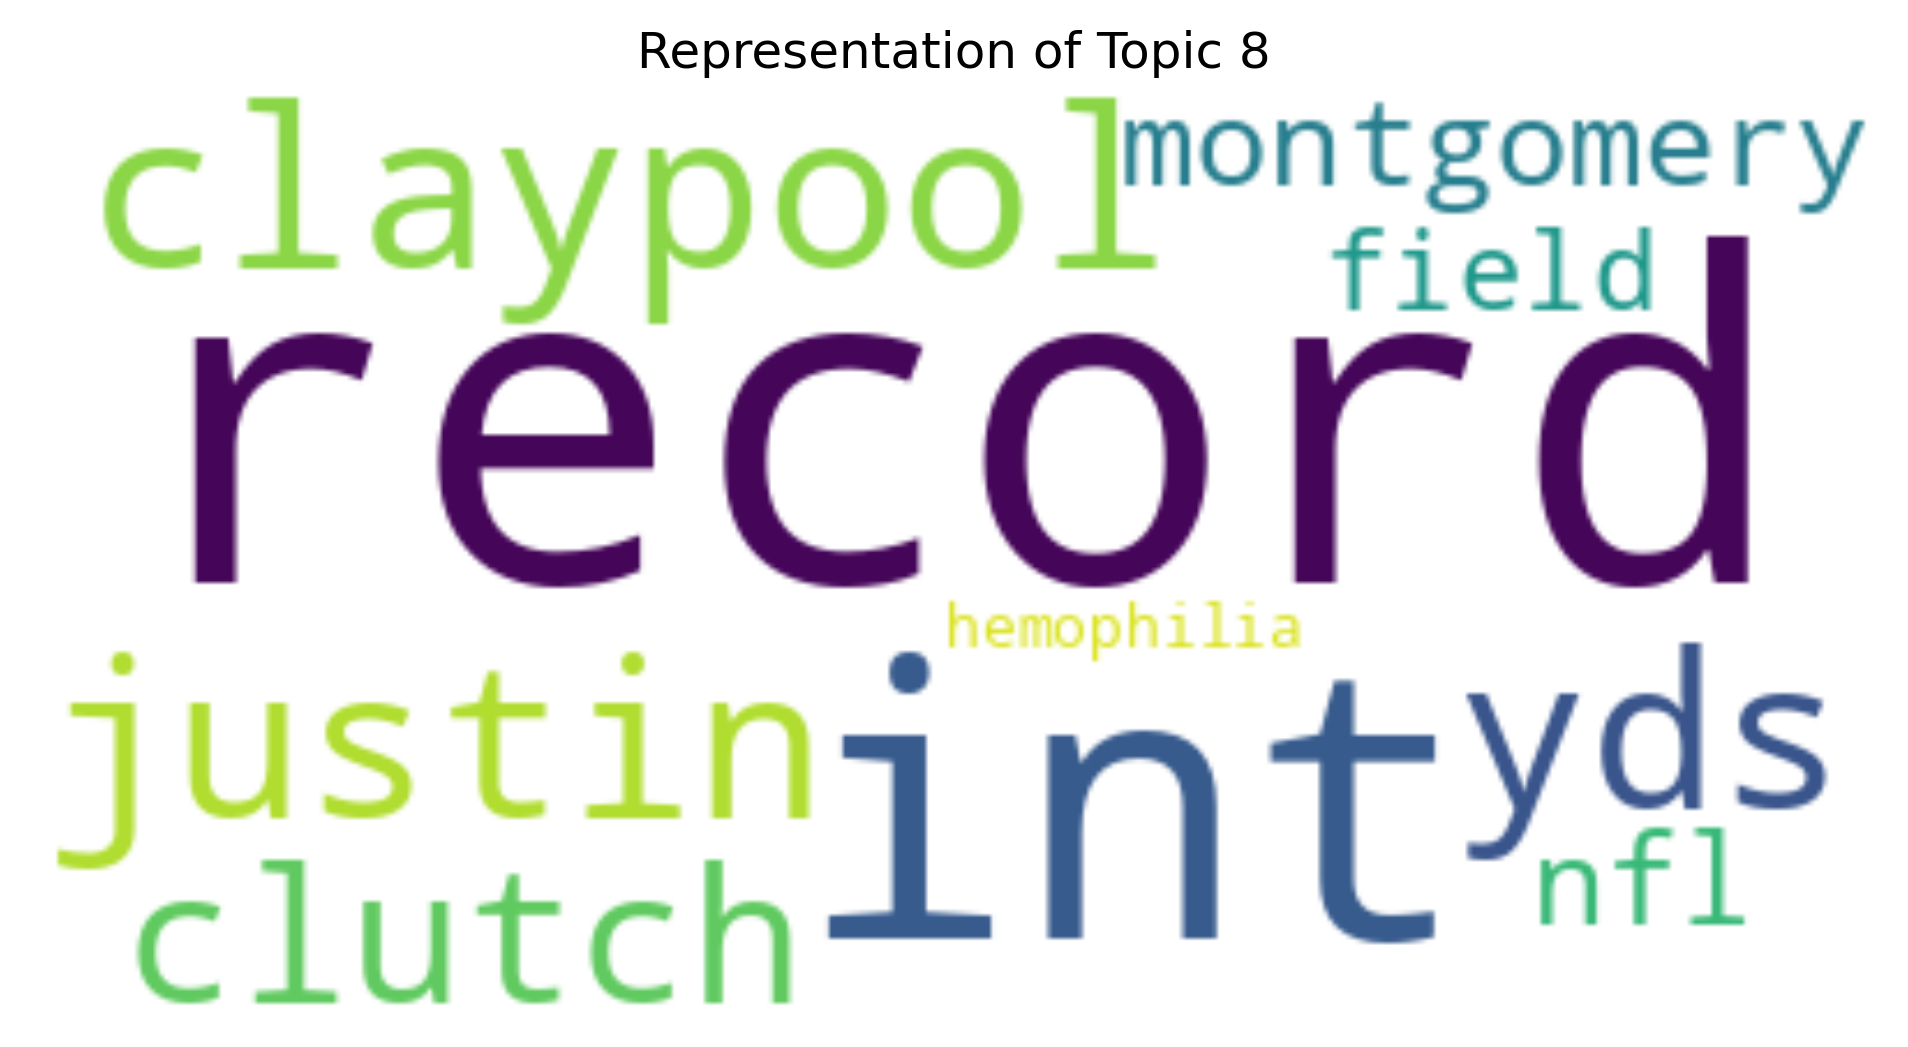

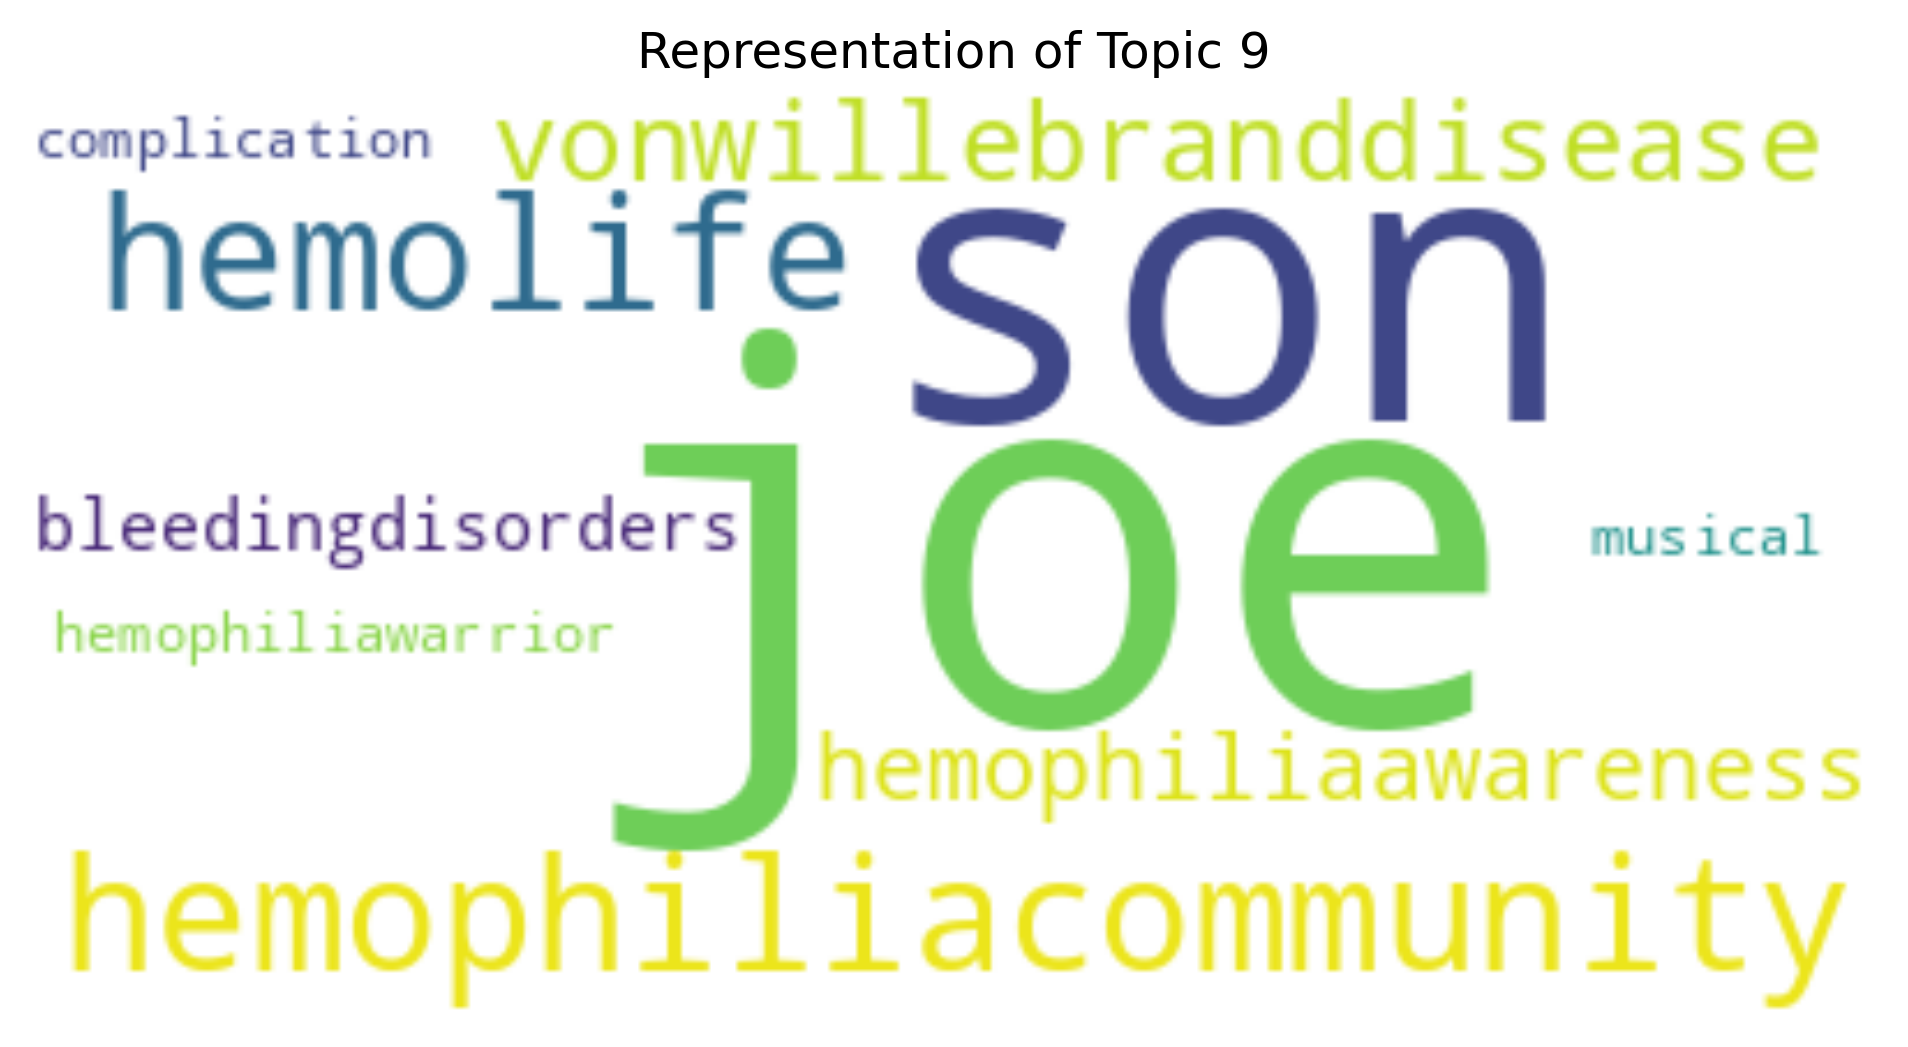

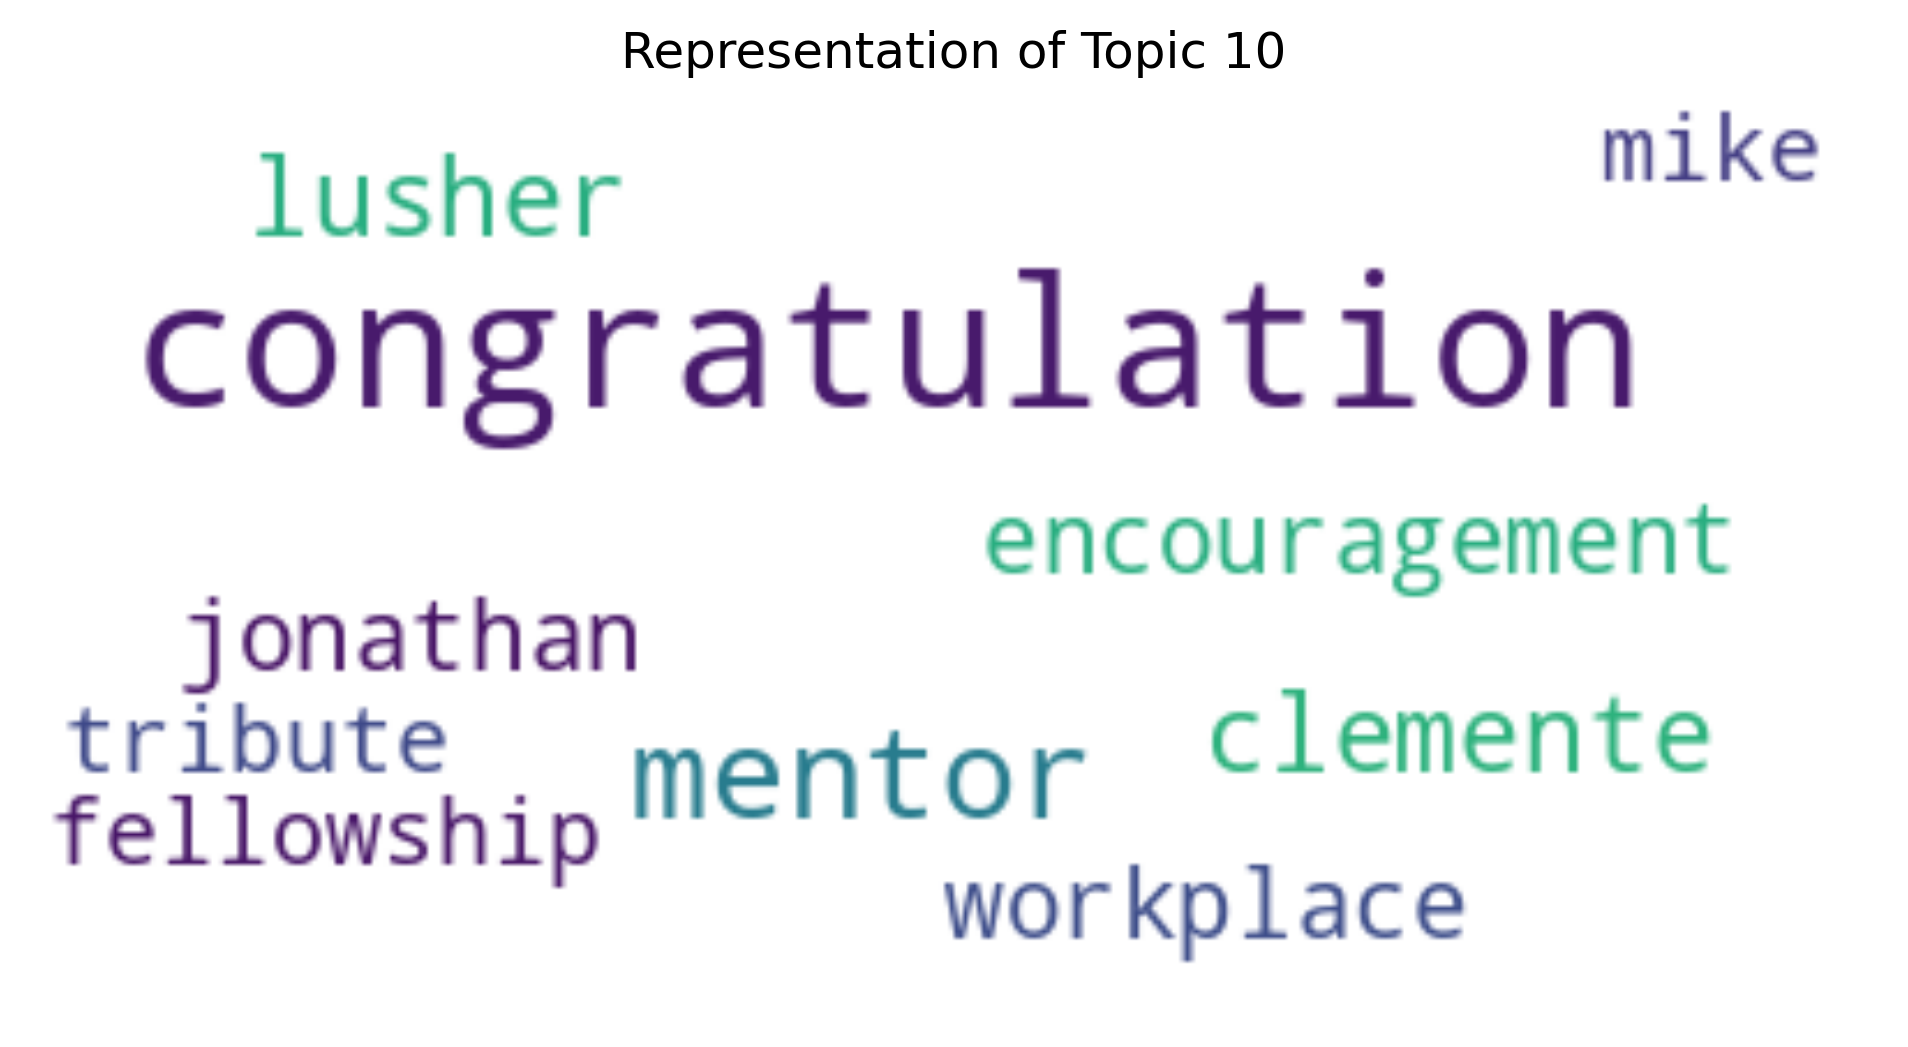

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(8, 4), dpi=300)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("Off")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,11):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_heatmap(n_clusters = 20)

In [ ]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.7987361675969131


In [ ]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)

19it [00:32,  1.71s/it]


In [ ]:
topics_over_time

Topic                                              Words  Frequency  \
0       -1  repost, brent, haemophilia, hemophilia, consor...        122   
1        0     hemophilia, haemophilia, blood, bleeding, gene        573   
2        2          pcos, curable, meditation, autism, siddha          7   
3        4          bleed, amputation, grief, incurable, hope         11   
4        5       grief, incurable, haemophilia, edward, slade          3   
..     ...                                                ...        ...   
969     86   longevity, macular, degeneration, promising, apr          1   
970     93  qualitative, representative, advocacy, meeting...          1   
971     97  inspirational, watch, ironman, campaigning, cl...          1   
972    100                     webinar, bar, et, sanofi, join          1   
973    106  suppress, mankyblood, scandal, journalist, report          1   

                  Timestamp  
0   2023-01-01 15:54:58.860  
1   2023-01-01 15:54:58.860  
2   2023-01-01 15:54:58.860  
3   2023-01-01 15:54:58.860  
4   2023-01-01 15:54:58.860  
..                      ...  
969 2023-11-21 22:34:03.000  
970 2023-11-21 22:34:03.000  
971 2023-11-21 22:34:03.000  
972 2023-11-21 22:34:03.000  
973 2023-11-21 22:34:03.000  

[974 rows x 4 columns]

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=100)